In [51]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from cil.optimisation.functions import KullbackLeibler, MixedL21Norm
from cil.optimisation.operators import BlockOperator, GradientOperator, IdentityOperator
from cil.optimisation.algorithms import PDHG
from cil.framework import ImageGeometry
import os, sys
import tomophantom
from tomophantom import TomoP2D

In [47]:
# Load a tomophantom image 
model = 12 # select a model number from the library
N = 256 # set dimension of the phantom
path = os.path.dirname(tomophantom.__file__)
path_library2D = os.path.join(path, "Phantom2DLibrary.dat")

phantom2D = TomoP2D.Model(model, N, path_library2D)    
ig = ImageGeometry(voxel_num_x=N, voxel_num_y=N)

In [59]:
# Fill the phantom into a ImageData container
data = ig.allocate()
data.fill(phantom2D)

In [60]:
# Add gaussian noise
n1 = TestData.random_noise(data, mode = 'poisson', seed = 10)
noisy_data = data.geometry.allocate()
noisy_data.fill(n1)

In [62]:
alpha = 1.5

F = alpha * MixedL21Norm()
G = KullbackLeibler(b=noisy_data)
K = GradientOperator(ig)

# Compute operator Norm
normK = K.norm()

# Primal & dual stepsizes
sigma = 1./normK
tau = 1./normK

# Setup and run the PDHG algorithm
pdhg = PDHG(f=F, g=G, operator=K, tau=tau, sigma=sigma,
            max_iteration = 500, update_objective_interval = 1)
pdhg.run(verbose=0)

Initialised GradientOperator with C backend running with  20  threads
PDHG setting up
PDHG configured


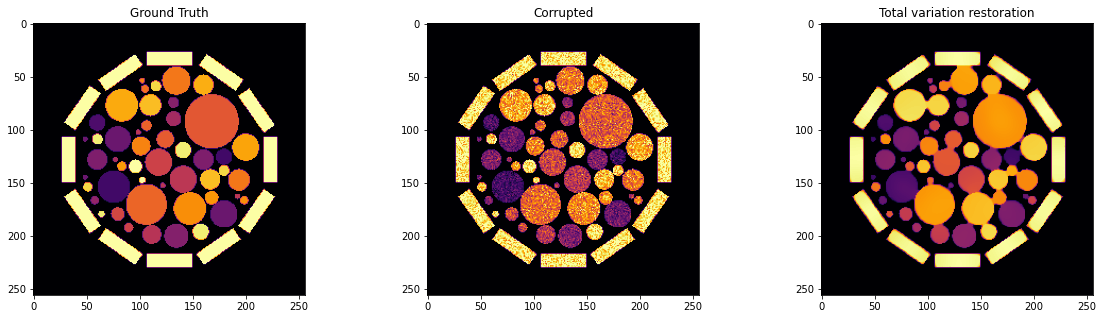

In [63]:
fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(data.as_array(), cmap="inferno")
plt.title('Ground Truth')
plt.subplot(1, 3, 2)
plt.imshow(noisy_data.as_array(), cmap="inferno")
plt.title('Corrupted')
plt.subplot(1, 3, 3)
plt.imshow(pdhg.solution.as_array(), cmap="inferno")
plt.title('Total variation restoration')
plt.show()